# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


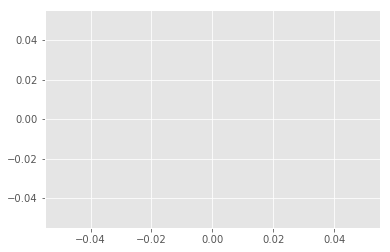

In [18]:
X = np.linspace(0,100, 1)
Y = 1 /X

plt.plot(X,Y)



#### Exercise

Plot the logistic function 


$$f(x) = \frnac{e^x}{1 + e^x}$$

Between 0 and 100


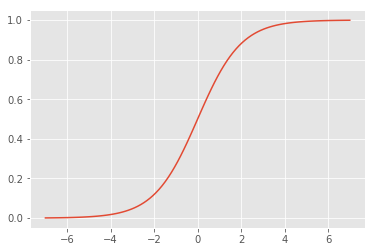

In [34]:
X = np.linspace(-7, 7, 100)

Y = np.e ** X / (1 + np.e ** X)

plt.plot(X,Y)
plt.show()


### Scatter plots

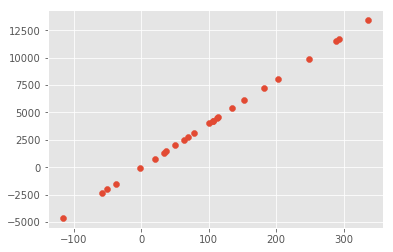

In [11]:
X2 = np.random.randn(25) * 100 + 100
Y2 = 2 * X2 * 20
plt.scatter(X2, Y2)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

### Bar plots

Do not confuse with histograms

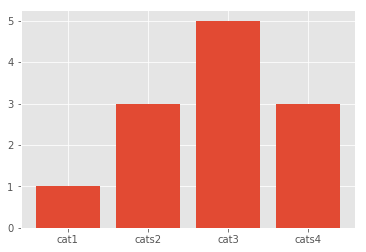

range(0, 4)

In [9]:
counts = [1,3,5,3]
categories = ['cat1', 'cats2','cat3', 'cats4']
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)),categories)
plt.show()
range(len(counts))

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

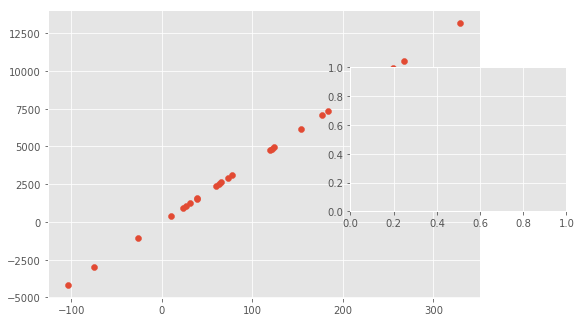

In [31]:
X2 = np.random.randn(25) * 100 + 100
Y2 = 2 * X2 * 20

myfigure = plt.figure()

myaxes = myfigure.add_axes([0,0,1,1])  

myaxes.scatter (X2, Y2)

my_second_axes = myfigure.add_axes([0.7,0.3,0.5,0.5])


### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

NameError: name 'all_' is not defined

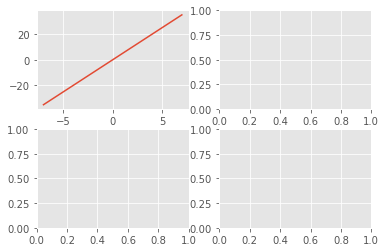

In [37]:
fig, all_axes = plt.subplots(2,2)
all_axes[0,0].plot(X, X * 5)
all_

### `figure.subplots()`

<class 'numpy.ndarray'> (2, 2)


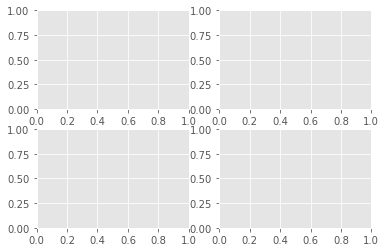

In [42]:
figure, axes = plt.subplots(2,2)
print(type(axes), axes.shape)

### Sharing axis

In [44]:
def generate_points(true_theta_0 = 2, true_theta_1 = 5):

    X = (np.random.randn(100) + 1) * 50
    jitter = 50 * np.random.randn(100)
    Y = true_theta_0 + true_theta_1 * X
    Y_randomized = Y + jitter

    return X, Y_randomized

NameError: name 'Y_randomized' is not defined

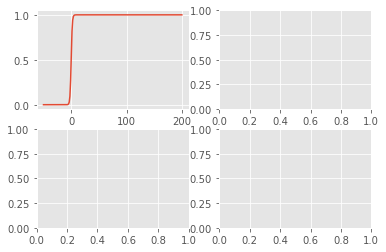

In [45]:
figure, axeses = plt.subplots(2,2)

X_2 = np.linspace(-50, 200, 200)
Y_2 = 1 / (1 + np.exp(-X_2))

axeses[0,0].plot(X_2, Y_2)
axeses[0,1].scatter(X, Y_randomized)
axeses[0,1].plot(X2, Y2, c='blue')
axeses[1,0].plot(X_2, X_2 ** 2)
axeses[1,1].plot(X2, X2)

figure.set_size_inches(10,6)
axeses[0,0].legend(['Logistic Function'])

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


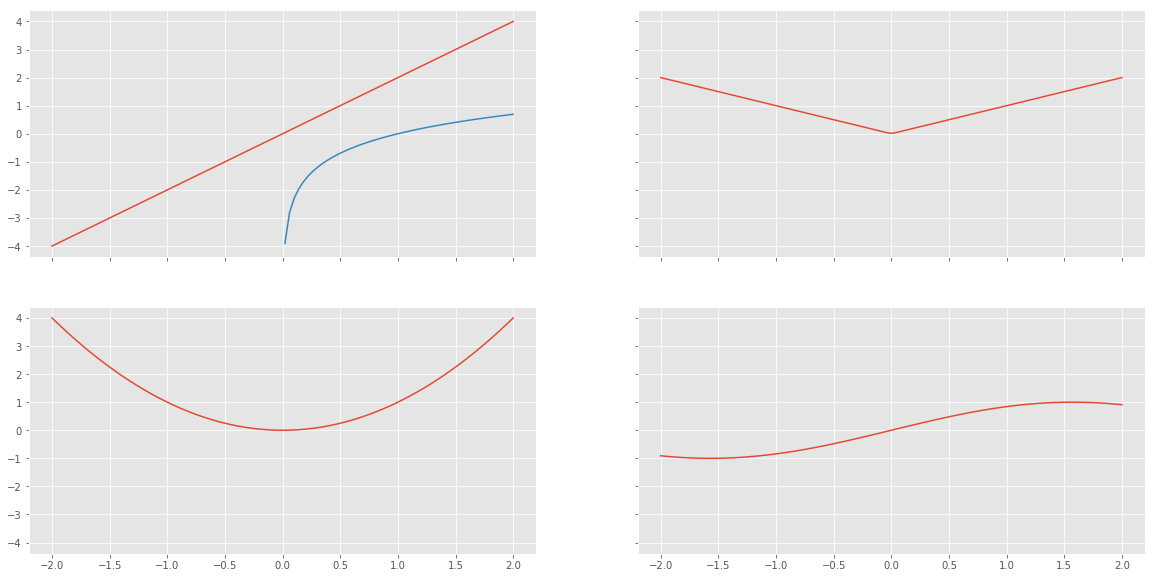

In [50]:
X = np.linspace(-2, 2, 100)

figure, axes_array = plt.subplots(2,2, sharex=True, sharey=True)
figure.set_size_inches(20,10)

# Linear and Log
axes_array[0,0].plot(X, 2*X)
axes_array[0,0].plot(X, np.log(X))

# Abs
axes_array[0,1].plot(X, np.abs(X))

# Square
axes_array[1,0].plot(X, X ** 2)

# Sin
axes_array[1,1].plot(X, np.sin(X))

plt.show()

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

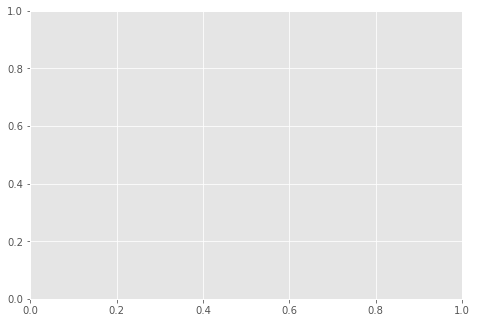

In [39]:
f = plt.figure()
ax = f.add_axes([0,0,1,1])ax.

X = np.linspace(-10, 10)


## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

### Markers and linestyles

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

In [51]:
normal = np.random.randn(2000)
plt.hist(normal, bins=np.linscape(-5, 5, 50)) 
plt.show()

AttributeError: module 'numpy' has no attribute 'linscape'

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



## Legends

## Ticks, tick labels, limits

### Ticks

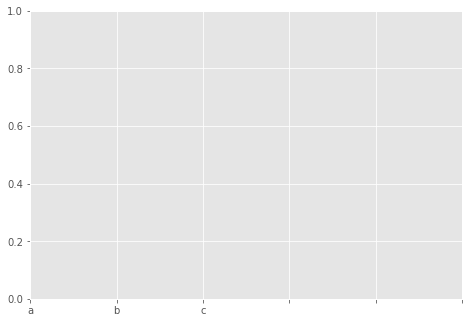

In [44]:
f = plt.figure()
ax = f.add_axes([0,0,1,1])
ax.set_xtit
ax.set_xticklabels(['a','b','c'])


### Tick labels

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [ ]:
houses = pd.read_csv('../../data/houses.csv', index = 0)
house.head()


In [26]:
short_column_names = ['local_prices', 'bathrooms', 'site_area', 
                      'living_area', 'garages', 'rooms', 
                      'bedrooms', 'age', 'construction_type', 
                      'architecture', 'fireplaces', 'price']

df.columns = short_column_names

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

In [ ]:
import seaborn as sns

### Scatter plots

### Histogram

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

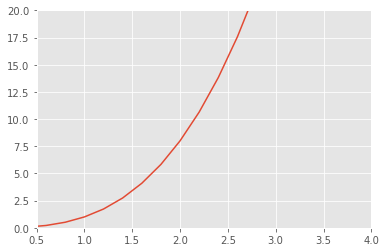

In [58]:
X = np.arange(0, 3, .2)
Y = X ** 3
plt.plot(X, Y)

axes = plt.gca()
axes.set_xlim((0.5,4))
axes.set_ylim((0,20))

plt.show()

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
https://www.kaggle.com/c/titanic/download/train.csv

In [63]:
titanic = pd.read_csv('/home/dsc/Downloads/train.csv', index_col=0)

titanic.columns = titanic.columns.str.lower()
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Swarm plot

In [64]:
sns.stripplot(data=titanic, x='pclass',y='fare', jitter=True);

NameError: name 'sns' is not defined

### Boxplot

### Barplot / countplot

In [ ]:
sns.barplot()

### Pointplot

## Other types

### Heatmap

### Clustermap

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)